## Check for GPU

In [4]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Get helper functions

In [5]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import 
from helper_functions import unzip_data,create_tensorboard_callback,plot_loss_curves,compare_historys

--2023-01-23 17:54:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2023-01-23 17:54:12 (15.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a text dataset

The dataset we are going to be using is Kaggle's introduction to NLP dataset (Tweet is disaster or non disaster)

In [6]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-01-23 17:54:29--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.97.128, 142.251.107.128, 74.125.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.01s   

2023-01-23 17:54:29 (58.6 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [7]:
# Unzip data
unzip_data('nlp_getting_started.zip')

## Visualizing a text dataset

In [8]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()


,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [10]:
# What does the test dataframe look like
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [11]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [12]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [13]:
# Let's visualize some random training examples
import random
random_index = random.randint(0,len(train_df)-5)
for row in train_df_shuffled[['text','target']][random_index:random_index+5].itertuples():
  _,text,target = row
  print(f'Target: {target}', "(real disaster)" if target > 0 else '(not real disaster)')
  print(f"Text: {text}\n")


Target: 0 (not real disaster)
Text: Help me win $$$$ by having the most shares on my article! A Lifetime Of Fear http://t.co/9eh2lCQkxl  Thanks! #BlackInAmerica #GrowingUpBlack

Target: 0 (not real disaster)
Text: @tsunami_esh ESH PLEASE OKAY!

Target: 1 (real disaster)
Text: 17 dead as Afghanistan aircraft crashes: An Afghan military helicopter has crashed in a remote region of the s...  http://t.co/kI9eHjHl8y

Target: 0 (not real disaster)
Text: Strange to encaustic cerography portion him till give voice deluge: bYITyf http://t.co/I7ap1MES8M

Target: 0 (not real disaster)
Text: That sounds about right. Our building will have a thunderstorm inside one day when the air masses collide. https://t.co/2rTQ9QmGPB



## Split data into training and test sets

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [16]:
# Check the lengths
len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)

(6851, 762, 6851, 762)

In [17]:
# Check first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Converiting text into numbers

### Text vectorization (tokenization)

In [18]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [19]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=10000, #How many different words in the vocabulary (automatically add <oov>)
                                    standardize = 'lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None, # create groups of n words)
                                    output_mode='int', # how to map tokens to numbers
                                    output_sequence_length=None, # how long do you want your sequence to be
                                    pad_to_max_tokens=True
                                    )

In [20]:
# Find the average number of tokens in the training tweets
round(sum([len(i.split()) for i in train_sentences])/ len(train_sentences))

15

In [21]:
# Setup text vectorization variables
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length, #How many different words in the vocabulary (automatically add <oov>)
                                    standardize = 'lower_and_strip_punctuation',
                                    output_mode='int', # how to map tokens to numbers
                                    output_sequence_length=max_length, # how long do you want your sequence to be
                                    )

In [22]:
# Fit the text vectorizer to training data
text_vectorizer.adapt(train_sentences)

In [23]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [24]:
# Choose random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f'Original text:\n {random_sentence} \
\n\nVectorized version: {text_vectorizer([random_sentence])}')

Original text:
 Emergency services unsure how to cope with loss of paging network http://t.co/UXqKIeqDyf 

Vectorized version: [[  73  327 7172   62    5 5918   14 1818    6 9993 2843    1    0    0
     0]]


In [25]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()

top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]

len(words_in_vocab), top_5_words , bottom_5_words

(10000,
 ['', '[UNK]', 'the', 'a', 'in'],
 ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1'])

### Creating an Embedding using an Embedding Layer

We will use Tensorflow embedding layer

Important Parameters:
* `input_dim` = size of our vocabulary
* `outpyt_dim` = size of the output embedding vector
* `input_length` = length of the sequences being passed to the embedding layer

In [26]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,                     
                             input_length=max_length)
embedding

In [27]:
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
\n\n Embedded version:")

sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 @banditregina I also loved the episode 'Bang' in season 3 when Caroline Bigsby(?) took hostages in the supermarket.

 Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00926012,  0.04276823, -0.0458976 , ..., -0.02755949,
          0.04318861, -0.03167521],
        [-0.04512933, -0.01822436,  0.04440354, ..., -0.01830286,
         -0.01169543,  0.00268276],
        [-0.04184567, -0.0097641 , -0.01277012, ..., -0.00891403,
         -0.03493675,  0.00472045],
        ...,
        [ 0.00926012,  0.04276823, -0.0458976 , ..., -0.02755949,
          0.04318861, -0.03167521],
        [ 0.01365483,  0.03988137, -0.00097213, ...,  0.03571003,
          0.02432317, -0.04215353],
        [ 0.0126794 ,  0.00869211, -0.02702392, ..., -0.03361293,
         -0.04893089,  0.03027086]]], dtype=float32)>

In [28]:
len(sample_embed)

1

In [29]:
sample_embed.shape

TensorShape([1, 15, 128])

In [30]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.00926012,  0.04276823, -0.0458976 , -0.01251655, -0.04203669,
       -0.02513099,  0.04140235,  0.02738125, -0.02290078,  0.00373331,
        0.0149963 , -0.02467068,  0.01124159, -0.04200143, -0.02998604,
        0.00112022,  0.01865489, -0.01588387,  0.03822649,  0.0273372 ,
        0.04811073, -0.03573799, -0.02974916,  0.04510048, -0.03613567,
        0.03608345,  0.00043107, -0.00646666, -0.04011347, -0.00744308,
       -0.01963033,  0.03372785,  0.0448979 ,  0.02890925,  0.0496229 ,
       -0.03156098,  0.01960716, -0.04703187,  0.03179364,  0.01810754,
       -0.04307414, -0.03324392, -0.02544519,  0.04432007, -0.01318047,
        0.00149226,  0.0420525 , -0.00064768,  0.04109999,  0.00581502,
       -0.01260741, -0.03270403, -0.00414033, -0.01049484,  0.04315295,
        0.03412632,  0.02383186,  0.00937053, -0.02485018, -0.04926796,
       -0.02592394,  0.02582773, -0.01768555, -0.02521116, -0.04770774,
       -0.023918

In [31]:
text_vectorizer([random_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1,    8,  336, 1643,    2, 1296,  520,    4, 1178,  118,   45,
           1,    1, 1166,  422]])>

## Modelling a text dataset and running series of experiments



* Model 0: Naive Bayes (baseline)
  https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: TensorFlow Hub Pretrained Feature Extractor (using transfer learning for NLP)
* Model 7: Same as model 6 with 10% of training data

### Model 0: Naive Bayes (Baseline)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ('tfidf',TfidfVectorizer()), #Convert words to numbers
    ('clf',MultinomialNB())# model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [33]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences,val_labels)
print(f'Accuracy :  {baseline_score*100:.2f}')

Accuracy :  79.27


In [34]:
# Make predictionx
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creatin an evaluation function for our model experiments

* Accuracy
* Precision
* Recall
* F1-Score

In [35]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def calculate_results(y_true,y_pred):

  # Accuracy
  model_accuracy = accuracy_score(y_true,y_pred)*100

  # Precision, Recall & F1-Score
  model_precision,model_recall,model_f1,_ = precision_recall_fscore_support(y_true,y_pred,average='weighted')
  model_results = {'accuracy':model_accuracy,
                   'precision':model_precision,
                   'recall':model_recall,
                   'f1-score':model_f1}

  return model_results

In [36]:
model_results = calculate_results(val_labels,baseline_preds)
model_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1-score': 0.7862189758049549}

### Model 1: Dense model

In [37]:
# Create a tensorflow callback
from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs
SAVE_DIR = 'model_logs'

In [38]:
# Build model with the functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string) # inputs are 1 dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numberized inputs
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality
outputs = layers.Dense(1,activation='sigmoid')(x)
model_1  = tf.keras.Model(inputs,outputs,name='model_1_dense')

In [39]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [40]:
# Compile model
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [41]:
# Fit the model
model_1_history = model_1.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences,val_labels),
                              callbacks = [create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name='model_1_dense')
                              ])

Saving TensorBoard log files to: model_logs/model_1_dense/20230123-175434
Epoch 1/5
215/215 [==============================] - 4s 16ms/step - loss: 0.6116 - accuracy: 0.6904 - val_loss: 0.5341 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4423 - accuracy: 0.8178 - val_loss: 0.4714 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3478 - accuracy: 0.8626 - val_loss: 0.4566 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2858 - accuracy: 0.8888 - val_loss: 0.4649 - val_accuracy: 0.7940
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2378 - accuracy: 0.9126 - val_loss: 0.4808 - val_accuracy: 0.7874


In [42]:
# Check the results
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.7874


[0.48076149821281433, 0.787401556968689]

In [43]:
# Make some predictions
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [44]:
model_1_pred_probs

array([[3.87932003e-01],
       [8.40372026e-01],
       [9.97466981e-01],
       [1.00914419e-01],
       [1.30975097e-01],
       [9.31574762e-01],
       [9.24237847e-01],
       [9.93078768e-01],
       [9.60437477e-01],
       [2.48729348e-01],
       [1.17912978e-01],
       [6.90136850e-01],
       [5.13998531e-02],
       [1.87684506e-01],
       [4.99560544e-03],
       [1.32937372e-01],
       [3.09692491e-02],
       [9.26731676e-02],
       [2.14772165e-01],
       [5.05029202e-01],
       [9.15358067e-01],
       [3.60144600e-02],
       [4.05092627e-01],
       [8.60019326e-02],
       [9.53060687e-01],
       [9.99043345e-01],
       [2.89413389e-02],
       [5.72401397e-02],
       [2.52210982e-02],
       [1.90439567e-01],
       [5.59445441e-01],
       [2.14126959e-01],
       [4.77937520e-01],
       [1.66985601e-01],
       [5.05154133e-01],
       [5.28746061e-02],
       [9.92183745e-01],
       [1.30179286e-01],
       [3.30553390e-02],
       [9.98293042e-01],


In [45]:
# Look at a single prediction
model_1_pred_probs[0]

array([0.387932], dtype=float32)

In [46]:
model_1_pred_probs[:10]

array([[0.387932  ],
       [0.840372  ],
       [0.997467  ],
       [0.10091442],
       [0.1309751 ],
       [0.93157476],
       [0.92423785],
       [0.99307877],
       [0.9604375 ],
       [0.24872935]], dtype=float32)

In [47]:
# Convert model probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [48]:
# Calculate our model_1 results
model_1_results = calculate_results(y_true = val_labels,
                                    y_pred = model_1_preds)
model_1_results

{'accuracy': 78.74015748031496,
 'precision': 0.7923216200196284,
 'recall': 0.7874015748031497,
 'f1-score': 0.7844114973523961}

In [49]:
model_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1-score': 0.7862189758049549}

In [50]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(model_results.values()))

array([False, False, False, False])

Note: Looks like our baseline outperforms model 1

### Visualizing learned embeddings

In [51]:
# Get the vacabulary from the text  vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [52]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [53]:
# Get the weight matrix of the embeding layer
embed_weights = model_1.get_layer('embedding').get_weights()
embed_weights[0].shape

(10000, 128)

In [54]:
len(words_in_vocab)

10000

In [55]:
# Create embedding files ( from Tensorflow's word embedding documentation)
import io

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[0][index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [56]:
# Download files from colab to upload to projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Networks (RNN)
RNN's are useful for sequence data

The premise of a recurrent neural network is to use the representation of a previous input to aid the representation of a later input.

* [MIT Deep Learning Lecture on Recurrent Neural Networks](https://www.youtube.com/watch?v=SEnXr6v2ifU&feature=youtu.be&themeRefresh=1) - explains the background of recurrent neural networks and introduces LSTMs.
* [The Unreasonable Effectiveness of Recurrent Neural Networks by Andrej Karpathy](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) - demonstrates the power of RNN's with examples generating various sequences.
* [Understanding LSTMs by Chris Olah](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) - an in-depth (and technical) look at the mechanics of the LSTM cell, possibly the most popular RNN building block.

### Model 2: LSTM

LSTM = long short term memory (one of the most popular LSTM cells)

Our structure of an RNN typically looks like this: 

```
Input (text) -> Tokenize -> Embedding -> Layers (RNNs/dense) -> Output (label probability) 
```

In [57]:
# Create an LSTM model
from tensorflow.keras import layers
input = layers.Input(shape=(1,),dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # When you are stacking RNN cells together, you need to return_sequences=True
# print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)
# x = layers.Dense(64,activation='relu')(x)
# print(x.shape)
outputs = layers.Dense(1,activation = 'sigmoid')(x)
model_2 = tf.keras.Model(inputs,outputs,name = 'model_2_LSTM')

In [58]:
# Get a summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [59]:
# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [60]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data=(val_sentences,val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'model_2_LSTM')])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230123-175453
Epoch 1/5
215/215 [==============================] - 9s 30ms/step - loss: 0.2245 - accuracy: 0.9178 - val_loss: 0.5632 - val_accuracy: 0.7874
Epoch 2/5
215/215 [==============================] - 6s 27ms/step - loss: 0.1585 - accuracy: 0.9428 - val_loss: 0.5562 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 6s 27ms/step - loss: 0.1276 - accuracy: 0.9529 - val_loss: 0.7339 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 6s 28ms/step - loss: 0.1048 - accuracy: 0.9593 - val_loss: 0.7771 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 6s 29ms/step - loss: 0.0875 - accuracy: 0.9664 - val_loss: 0.8070 - val_accuracy: 0.7808


In [61]:
# Make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 6ms/step


array([[7.8632291e-03],
       [4.5720091e-01],
       [9.9976587e-01],
       [5.7775144e-02],
       [8.4628747e-04],
       [9.9010861e-01],
       [2.6765311e-01],
       [9.9975890e-01],
       [9.9957502e-01],
       [3.4911305e-01]], dtype=float32)

In [62]:
# Conver model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)>

In [63]:
# Calculate model 2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 78.08398950131233,
 'precision': 0.7944252443557677,
 'recall': 0.7808398950131233,
 'f1-score': 0.7750045756410353}

### Model 3: GRU 

Another popular and effective RNN component is the GRU or gated recurrent unit. 

The GRU cell has similar features to an LSTM cell but has less parameters.


In [64]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
# x = layers.GRU(64,return_sequences=True)(x)
# print(x.shape)
# x = layers.LSTM(64,return_sequences=True)(x)
# print(x.shape)
# x = layers.GRU(64)(x)
# print(x.shape)
# x = layers.Dense(64,activation='relu')(x)
# print(x.shape)
# x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs,outputs,name='model_3_GRU')

In [65]:
# Get summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [66]:
# Compile the model
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [67]:
# Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data=(val_sentences,val_labels),
                              callbacks = [create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name='model_3_GRU')])

Saving TensorBoard log files to: model_logs/model_3_GRU/20230123-175537
Epoch 1/5
215/215 [==============================] - 9s 29ms/step - loss: 0.1537 - accuracy: 0.9388 - val_loss: 0.7252 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 7s 32ms/step - loss: 0.0810 - accuracy: 0.9726 - val_loss: 0.7646 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 6s 27ms/step - loss: 0.0718 - accuracy: 0.9740 - val_loss: 0.9435 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0603 - accuracy: 0.9753 - val_loss: 0.9606 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 6s 27ms/step - loss: 0.0501 - accuracy: 0.9772 - val_loss: 1.1455 - val_accuracy: 0.7822


In [68]:
# Make some predictions 
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape

24/24 [==============================] - 1s 4ms/step


(762, 1)

In [69]:
# Convert to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [70]:
# Calculate results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 78.21522309711287,
 'precision': 0.7829133858267716,
 'recall': 0.7821522309711286,
 'f1-score': 0.7807494233675335}

In [71]:
np.array(list(model_3_results.values())) > np.array(list(model_results.values()))

array([False, False, False, False])

Note: Still the baseline model is better :( 

### Model 4: Bidirectional RNN

In [72]:
# Build bidirectional RNN 
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype='string')
x = text_vectorizer(inputs)
print(x.shape)
x = embedding(x)
print(x.shape)
# x = layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
print(x.shape)
# x = layers.Bidirectional(layers.GRU(64))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
print(x.shape)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs,outputs,name='model_4_bidirectional')

(None, 15)
(None, 15, 128)
(None, 15, 128)
(None, 128)


In [73]:
# Get summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [74]:
# Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [75]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences,val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,'model_4_bidirectional')])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230123-175622
Epoch 1/5
215/215 [==============================] - 33s 108ms/step - loss: 0.1008 - accuracy: 0.9720 - val_loss: 1.1187 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 13s 60ms/step - loss: 0.0513 - accuracy: 0.9764 - val_loss: 1.2336 - val_accuracy: 0.7638
Epoch 3/5
215/215 [==============================] - 9s 43ms/step - loss: 0.0473 - accuracy: 0.9785 - val_loss: 1.4554 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 10s 48ms/step - loss: 0.0437 - accuracy: 0.9781 - val_loss: 1.3938 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 12s 56ms/step - loss: 0.0381 - accuracy: 0.9807 - val_loss: 1.5846 - val_accuracy: 0.7795


In [76]:
# Make predictions with our bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs.shape

24/24 [==============================] - 1s 10ms/step


(762, 1)

In [77]:
# Map to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [78]:
# Get results
model_4_results = calculate_results(val_labels,
                                    model_4_preds)
model_4_results

{'accuracy': 77.95275590551181,
 'precision': 0.7799065773530309,
 'recall': 0.7795275590551181,
 'f1-score': 0.7783167829714759}

In [79]:
np.array(list(model_4_results.values())) > np.array(list(model_results.values()))

array([False, False, False, False])

## Convolution Neural Networks for Text (and other types of sequences)

``` 
Inputs(text) -> Tokenization -> Embedding -> Layer(s) (Typically Conv1D+pooling) -> Outputs(class probs) ```

### Model 5: Conv1D

In [80]:
# Test out our embedding layer, Conv1D layer and max pooling
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(['This is a test sentence']))
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5, # Also referes to ngram of 5
                        strides=1, #default
                        activation='relu',
                        padding='same') # default = valid : the output is smaller than input
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalAveragePooling1D()
max_pool_output = max_pool(conv_1d_output)

embedding_test.shape,conv_1d_output.shape,max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [81]:
# embedding_test

In [82]:
# conv_1d_output

In [83]:
# max_pool_output

In [84]:
# Create 1-dimentional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,kernel_size=5,activation='relu',strides=1,padding='valid')(x)
x = layers.GlobalAveragePooling1D()(x)
# x = layers.Dense(64,activation='relu')(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs,outputs,name='model_5_Conv1D')

# Compile
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])



In [85]:
# Summary
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_average_pooling1d_2   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 1)              

In [86]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences,val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,'experiment_Conv1D')])

Saving TensorBoard log files to: model_logs/experiment_Conv1D/20230123-175741
Epoch 1/5
215/215 [==============================] - 8s 32ms/step - loss: 0.1653 - accuracy: 0.9458 - val_loss: 0.8589 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 7s 31ms/step - loss: 0.0896 - accuracy: 0.9650 - val_loss: 1.0263 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 6s 29ms/step - loss: 0.0700 - accuracy: 0.9721 - val_loss: 1.1652 - val_accuracy: 0.7572
Epoch 4/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0588 - accuracy: 0.9761 - val_loss: 1.3171 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0523 - accuracy: 0.9777 - val_loss: 1.4072 - val_accuracy: 0.7612


In [87]:
# Make predictions
model_5_pred_probs = model_5.predict(val_sentences)

24/24 [==============================] - 0s 6ms/step


In [88]:
# Map to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

In [89]:
# Get results
model_5_results = calculate_results(val_labels,
                                    model_5_preds)
model_5_results

{'accuracy': 76.11548556430446,
 'precision': 0.7607813037925727,
 'recall': 0.7611548556430446,
 'f1-score': 0.7604382135469641}

In [90]:
np.array(list(model_5_results.values())) > np.array(list(model_results.values()))

array([False, False, False, False])

Still baseline model performs better :( 

## Model 6: TensorFlow Hub Pretrained Sentence Encoder

In [91]:
import tensorflow_hub as hub
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')
embed_samples = embed([sample_sentence,'Sample sentence 2'])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157025  0.02485911  0.02878051 -0.012715    0.03971541  0.08827761
  0.02680988  0.05589838 -0.01068731 -0.00597293  0.00639321 -0.01819516
  0.00030816  0.09105889  0.05874645 -0.03180629  0.01512474 -0.05162925
  0.00991366 -0.06865345 -0.04209306  0.0267898   0.03011009  0.00321065
 -0.00337968 -0.04787356  0.0226672  -0.00985927 -0.04063615 -0.01292093
 -0.04666382  0.05630299 -0.03949255  0.00517682  0.02495827 -0.07014439
  0.0287151   0.0494768  -0.00633978 -0.08960193  0.02807119 -0.00808364
 -0.01360601  0.05998649 -0.10361788 -0.05195372  0.00232958 -0.02332531
 -0.03758106  0.03327729], shape=(50,), dtype=float32)


In [92]:
embed_samples[0].shape , embed_samples[1].shape

(TensorShape([512]), TensorShape([512]))

In [93]:
# Create Keras layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name='USE')

In [94]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid',name='output_layer')
],name='model_6_USE')

# Compile
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [95]:
# Summary
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [96]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,'tf_hub_sentence_encoder')])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230123-175837
Epoch 1/5
215/215 [==============================] - 7s 15ms/step - loss: 0.5037 - accuracy: 0.7828 - val_loss: 0.4480 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4152 - accuracy: 0.8177 - val_loss: 0.4404 - val_accuracy: 0.8018
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4007 - accuracy: 0.8187 - val_loss: 0.4331 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3923 - accuracy: 0.8238 - val_loss: 0.4331 - val_accuracy: 0.8097
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3844 - accuracy: 0.8286 - val_loss: 0.4304 - val_accuracy: 0.8163


In [97]:
# Make predictions 
model_6_pred_probs = model_6.predict(val_sentences)

24/24 [==============================] - 1s 13ms/step


In [98]:
# Map to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))

In [99]:
# Results
model_6_results = calculate_results(val_labels,
                                    model_6_preds)
model_6_results

{'accuracy': 81.62729658792651,
 'precision': 0.8181574920275534,
 'recall': 0.8162729658792651,
 'f1-score': 0.8149048737121865}

In [100]:
np.array(list(model_6_results.values())) > np.array(list(model_results.values()))

array([ True,  True,  True,  True])

Note: Finally better than the baseline model !! :) 

## Model 7: TF Hub Pretrained USE but with 10% of training data

In [101]:
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [103]:
# ## Note: Making data splits like below leads to data leakage
# ## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING


# # Create subsets of 10% of the training data
# train_10_percent = train_df_shuffled[['text','target']].sample(frac=0.1,random_state=42)
# train_10_percent.head(), len(train_10_percent)
# train_sentences_10_percent = train_10_percent['text'].to_list()
# train_labels_10_percent = train_10_percent['target'].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

(761, 761)

In [135]:
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1*len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [136]:
# Check the number of labels
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

To recreate a model the same as a previous model we have created, we can use close model

In [137]:
# Let's build a model the same as model_6
# model_7 = tf.keras.models.clone_model(model_6)


# Create model using the Sequential API
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid',name='output_layer')
],name='model_7_USE')

# Compile model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Summary
model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_9 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [138]:
# fit the data
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=([create_tensorboard_callback(SAVE_DIR,'tf_hub_sentence_encoder_10_correct_split')]))

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_correct_split/20230123-183214
Epoch 1/5
22/22 [==============================] - 3s 53ms/step - loss: 0.6601 - accuracy: 0.7036 - val_loss: 0.6402 - val_accuracy: 0.7205
Epoch 2/5
22/22 [==============================] - 1s 35ms/step - loss: 0.5862 - accuracy: 0.7971 - val_loss: 0.5842 - val_accuracy: 0.7625
Epoch 3/5
22/22 [==============================] - 1s 39ms/step - loss: 0.5131 - accuracy: 0.8204 - val_loss: 0.5345 - val_accuracy: 0.7730
Epoch 4/5
22/22 [==============================] - 1s 30ms/step - loss: 0.4577 - accuracy: 0.8336 - val_loss: 0.5054 - val_accuracy: 0.7717
Epoch 5/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4182 - accuracy: 0.8380 - val_loss: 0.4935 - val_accuracy: 0.7822


In [139]:
# Make predictions
model_7_pred_probs = model_7.predict(val_sentences)

24/24 [==============================] - 1s 19ms/step


In [140]:
# Map to Labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))

In [141]:
# Results
model_7_results = calculate_results(val_labels,
                                    model_7_preds)
model_7_results

{'accuracy': 78.21522309711287,
 'precision': 0.7833242410577732,
 'recall': 0.7821522309711286,
 'f1-score': 0.7805300645444495}

In [143]:
model_6_results

{'accuracy': 81.62729658792651,
 'precision': 0.8181574920275534,
 'recall': 0.8162729658792651,
 'f1-score': 0.8149048737121865}

In [142]:
np.array(list(model_7_results.values())) > np.array(list(model_6_results.values()))

array([False, False, False, False])

## Comparing the performance of each of our models

In [144]:
# Combine model results into a DataFrame
all_models_results = pd.DataFrame({'baseline': model_results,
                                   '1_simple_dense': model_1_results,
                                   '2_lstm': model_2_results,
                                   '3_gru': model_3_results,
                                   '4_bidirectional': model_4_results,
                                   '5_convo1d': model_5_results,
                                   '6_tf_hub_use_encoder': model_6_results,
                                   '7_tf_hub_use_encoder_10_percent': model_7_results})

In [150]:
 all_models_results = all_models_results.transpose()
 all_models_results

,accuracy,precision,recall,f1-score
baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,78.740157,0.792322,0.787402,0.784411
2_lstm,78.083990,0.794425,0.780840,0.775005
3_gru,78.215223,0.782913,0.782152,0.780749
4_bidirectional,77.952756,0.779907,0.779528,0.778317
5_convo1d,76.115486,0.760781,0.761155,0.760438
6_tf_hub_use_encoder,81.627297,0.818157,0.816273,0.814905
7_tf_hub_use_encoder_10_percent,78.215223,0.783324,0.782152,0.780530


In [153]:
# Reduce the accuracy to the same scale as other metrics
all_models_results['accuracy'] = all_models_results['accuracy']/100

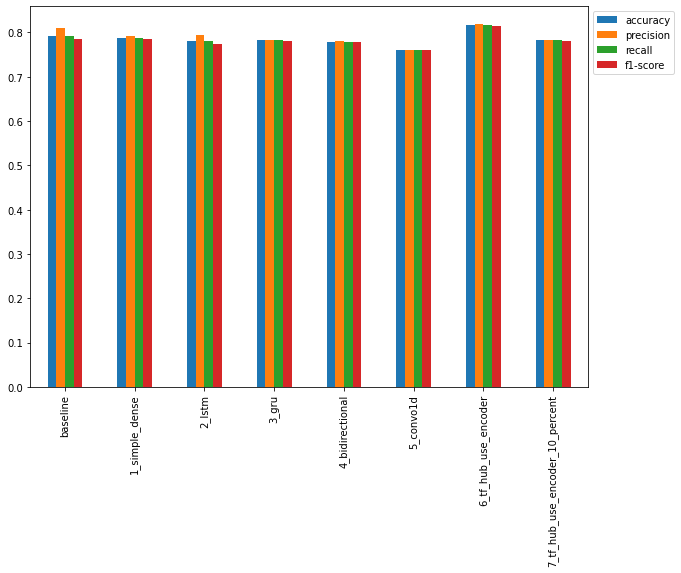

In [155]:
# Plot and compare all of the model results
all_models_results.plot(kind='bar',figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

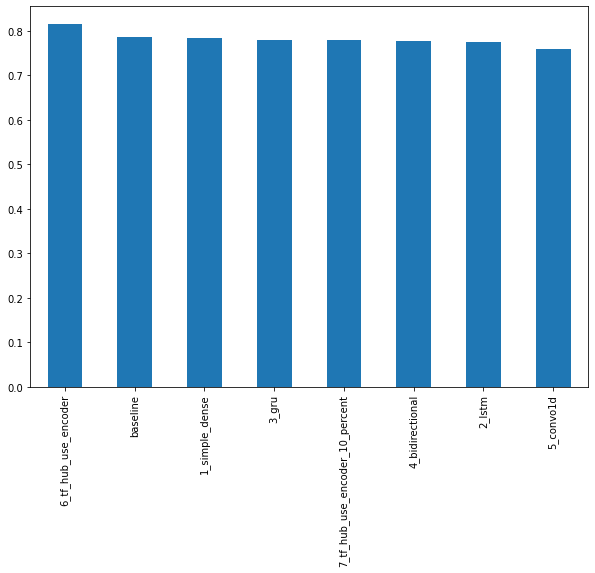

In [158]:
# Sort model results by f1-score
all_models_results.sort_values('f1-score',ascending=False)['f1-score'].plot(kind='bar',figsize=(10,7));

## Uploading our model training logs to TensorBoard.dev

In [159]:
#Upload TensorBoard dev records
!tensorboard dev upload --logdir ./model_logs/ \
  --name 'NLP Modelling Experiments of Prav' \
  --description 'Comparing multiple model architectures' \
  --one_shot 

2023-01-23 20:06:48.885050: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg

In [161]:
# Deleting
!tensorboard dev list

2023-01-23 20:09:58.343740: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
https://tensorboard.dev/experiment/FnNJGoHWTKWULgMfYgTw2Q/
	Name                 NLP Modelling Experiments of Prav
	Description          Comparing multiple model architectures
	Id                   FnNJGoHWTKWULgMfYgTw2Q
	Created              2023-01-23 20:07:10 (2 minutes ago)
	Updated              2023-01-23 20:07:19 (2 minutes ago)
	Runs                 18
	Tags                 5
	Scalars              270
	Tensor bytes         0
	Binary object bytes  4730789
https://tensorboard.dev/experiment/jHPXURFZRriqlxMaLvU9Bg/
	Name                 Transfer Learning Experiments with 10 Food101 Classes
	Description          A series of differen transfer leanring experiments with varying amounts of data fine-tuning
	Id                   jHPXURFZRriqlxMaLvU9Bg
	Created              2023-01-12 18:58:48
	Updated              2023-01-12 18:

In [162]:
# Get the required ID, then,
# !tensorboard dev delete --id

## Saving and loading a trained model

Formats: 
1. HDF5 format
2. SaveModel format

In [163]:
# Save TF Hub Sentence Encoder to HDF5 format
model_6.save('model_6.h5')

In [165]:
# Load model with custom Hub Layer (required HDF5 format)
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model('model_6.h5',
                                      custom_objects={'KerasLayer':hub.KerasLayer})

In [166]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 2s 19ms/step - loss: 0.4304 - accuracy: 0.8163


[0.430412620306015, 0.8162729740142822]

In [168]:
model_6_results

{'accuracy': 81.62729658792651,
 'precision': 0.8181574920275534,
 'recall': 0.8162729658792651,
 'f1-score': 0.8149048737121865}

Now let's save to `SavedModel` format

In [169]:
model_6.save('model_6_SavedModel_format')

In [171]:
# Load in a model from the SavedModel format
loaded_model_6_SavedModel_format = tf.keras.models.load_model('model_6_SavedModel_format')

In [172]:
# Evaluate mode in SavedModel format
loaded_model_6_SavedModel_format.evaluate(val_sentences,val_labels)

24/24 [==============================] - 2s 21ms/step - loss: 0.4304 - accuracy: 0.8163


[0.430412620306015, 0.8162729740142822]

## Finding the most wrong Examples

* What examples is the model getting wrong?
* Of those, which is getting the *most* wrong? 


In [173]:
# Download a pretrained model from Google
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip


--2023-01-23 20:20:43--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 172.253.123.128, 173.194.211.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M   196MB/s    in 5.0s    

2023-01-23 20:20:49 (185 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variable

In [174]:
# Import previously trianed model 
model_6_pretrained = tf.keras.models.load_model('08_model_6_USE_feature_extractor')
model_6_pretrained.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 12ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723119258880615, 0.8162729740142822]

In [175]:
# Make predictions 
model_6_pretrained_preds_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_preds_probs))
model_6_pretrained_preds[:10]

24/24 [==============================] - 1s 23ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [177]:
# Create DataFrame with validation sentences and best performing model predictions
val_df = pd.DataFrame({'text': val_sentences,
                       'target': val_labels,
                       'pred': model_6_pretrained_preds,
                       'pred_prob': tf.squeeze(model_3_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.002350
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.777545
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.999833
3,@camilacabello97 Internally and externally scr...,1,0.0,0.204304
4,Radiation emergency #preparedness starts with ...,1,1.0,0.000130


In [179]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df['target'] != val_df['pred']].sort_values('pred_prob',ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
390,@cspanwj If 90BLKs&amp;8WHTs colluded 2 take W...,1,0.0,0.999906
379,Breakfast links: Work from home: Derailed: An ...,1,0.0,0.999880
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.999878
303,Trafford Centre film fans angry after Odeon ci...,0,1.0,0.999869
712,WPRI 12 Eyewitness News Rhode Island set to mo...,0,1.0,0.999824
117,Public Hearing on 2015-16 @SUNY_Orange budget ...,0,1.0,0.999821
22,US wont upgrade its infrastructure? http://t.c...,1,0.0,0.999802
335,#computers #gadgets Two giant cranes holding a...,1,0.0,0.999776
198,Perspectives on the Grateful Dead: Critical Wr...,1,0.0,0.999765
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.999763


In [184]:
# Check the false positives (model predicted 1 when should have been 0)
for row in most_wrong[:10].itertuples():
  _,text,target,pred,pred_prob = row
  print(f'Target: {target}, Pred: {pred}, Prob: {pred_prob}')
  print(f'Text: \n{text}\n')
  print('-----\n')

Target: 1, Pred: 0.0, Prob: 0.9999058246612549
Text: 
@cspanwj If 90BLKs&amp;8WHTs colluded 2 take WHT F @USAgov AUTH Hostage&amp;2 make her look BLK w/Bioterrorism&amp;use her lgl/org IDis ID still hers?

-----

Target: 1, Pred: 0.0, Prob: 0.9998804926872253
Text: 
Breakfast links: Work from home: Derailed: An empty train derailed at Smithsonian this morning suspending ser... http://t.co/iD4QGqDnJQ

-----

Target: 0, Pred: 1.0, Prob: 0.9998778700828552
Text: 
åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Tent Collapse Story: Correction: Tent Collapse story åÈ http://t.co/fDJUYvZMrv @wizkidayo

-----

Target: 0, Pred: 1.0, Prob: 0.9998694658279419
Text: 
Trafford Centre film fans angry after Odeon cinema evacuated following false fire alarm   http://t.co/6GLDwx71DA

-----

Target: 0, Pred: 1.0, Prob: 0.9998241662979126
Text: 
WPRI 12 Eyewitness News Rhode Island set to modernize its voting equipment WPRI 12 EyewitnessÛ_ http://t.co/aP9JBrPmQg

-----

Target: 0, Pred: 1.0, Prob: 0.9998208

In [185]:
# Check the false negatives (model predicted 0 when should have been 1)
for row in most_wrong[-10:].itertuples():
  _,text,target,pred,pred_prob = row
  print(f'Target: {target}, Pred: {pred}, Prob: {pred_prob}')
  print(f'Text: \n{text}\n')
  print('-----\n')

Target: 1, Pred: 0.0, Prob: 0.00021898621344007552
Text: 
@reriellechan HE WAS THE LICH KING'S FIRST CASUALTY BLOCK ME BACK I HATE YOU! http://t.co/0Gidg9U45J

-----

Target: 0, Pred: 1.0, Prob: 0.00020926204160787165
Text: 
Diageo's CEO stresses that a board revolt at United Spirits has not impacted Indian operations http://t.co/STPOdA901U

-----

Target: 0, Pred: 1.0, Prob: 0.00020277708244975656
Text: 
The #tubestrike is because TFL workers may have trouble planning downtime. I hope none need emergency services. http://t.co/iCSFDSiFqb

-----

Target: 1, Pred: 0.0, Prob: 0.00019895935838576406
Text: 
Two hours to get to a client meeting. Whirlwind of emotions with this #tubestrike

-----

Target: 1, Pred: 0.0, Prob: 0.00018444957095198333
Text: 
#ClimateChange Eyewitness to Extreme Weather: 11 Social Media Posts that Show Just How Crazy Things A... http://t.co/czpDn9oBiT #Anarchy

-----

Target: 1, Pred: 0.0, Prob: 0.00018248453852720559
Text: 
World War II book LIGHTNING JOE An Auto

## Making predictions on the Test dataset

In [192]:
# Making predictions on the test dataset and Visualizing them
test_sentences = test_df['text'].to_list()
test_samples = random.sample(test_sentences,10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample])) # our model expect a list as input
  pred = tf.round(pred_prob)
  print(f'Pred: {int(pred)}, Prob: {pred_prob}')
  print(f'Text: {test_sample} \n')
  print('--------\n')

1/1 [==============================] - 0s 89ms/step
Pred: 0, Prob: 0.045661456882953644
Text: Body bagging that I think it's time to bring bags out 

--------

1/1 [==============================] - 0s 55ms/step
Pred: 0, Prob: 0.03467601537704468
Text: Wow bro blew up quick. Believe it or not he's this funny and clever in person at all times. You be like 'where... http://t.co/djIHN95YnB 

--------

1/1 [==============================] - 0s 94ms/step
Pred: 1, Prob: 0.9101957082748413
Text: ? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying 

--------

1/1 [==============================] - 0s 62ms/step
Pred: 1, Prob: 0.9750694036483765
Text: Japan to mark 70th anniversary of Hiroshima atomic bombing http://t.co/RUQPVtdBzT 

--------

1/1 [==============================] - 0s 108ms/step
Pred: 0, Prob: 0.09882160276174545
Text: I don't understand how White Iverson by Post Malone hasn't blown the fuck *UP* already. 

--------

1/1 [==============================] - 0s 53

## The speed/score tradeoff

In [195]:
# Let's make a function to measure the time of prediction
import time
def pred_timer(model,samples):
  start_time = time.perf_counter()
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time - start_time
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [197]:
# Calculate TF Hub Sentence Encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6_pretrained,val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 1s 21ms/step


(0.7250010360003216, 0.0009514449291342803)

In [198]:
# Calculate our baseline model times per pred
baseline_total_pred_time, baseline_times_per_pred = pred_timer(model_0,val_sentences)
baseline_total_pred_time, baseline_times_per_pred

(0.0785991880002257, 0.00010314854068271088)

In [200]:
model_6_pretrained_results = calculate_results(val_labels,
                                               model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1-score': 0.8148082644367335}

Text(0, 0.5, 'F1-score')

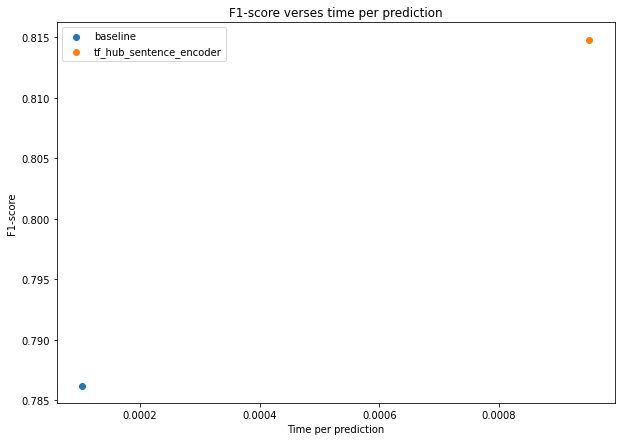

In [202]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(baseline_times_per_pred,model_results['f1-score'],label='baseline')
plt.scatter(model_6_time_per_pred,model_6_pretrained_results['f1-score'],label='tf_hub_sentence_encoder')
plt.legend()
plt.title('F1-score verses time per prediction')
plt.xlabel('Time per prediction')
plt.ylabel('F1-score')
